# Lasso feature selection
In this notebook we will use lasso for feature selection on:

In [0]:
install.packages("glmnet", dependencies=TRUE)
install.packages("survival", dependencies = TRUE)
library(glmnet)
library(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘maxstat’, ‘flexsurv’


Warning message in install.packages("survminer", dependencies = TRUE):
“installation of package ‘mvtnorm’ had non-zero exit status”
Warning message in install.packages("survminer", dependencies = TRUE):
“installation of package ‘maxstat’ had non-zero exit status”
Warning message in install.packages("survminer", dependencies = TRUE):
“installation of package ‘flexsurv’ had non-zero exit status”
Warning message in install.packages("survminer", dependencies = TRUE):
“installation of package ‘survminer’ had non-zero exit status”


In [0]:
# we get the data that have been prepared
training_data = read.csv('MergedStdTrainingInput.csv')
output_data = read.csv('y_train.csv')
training_data$PatientID <- NULL
output_data$PatientID <- NULL

x = as.matrix(training_data)
y = Surv(output_data$SurvivalTime, output_data$Event)

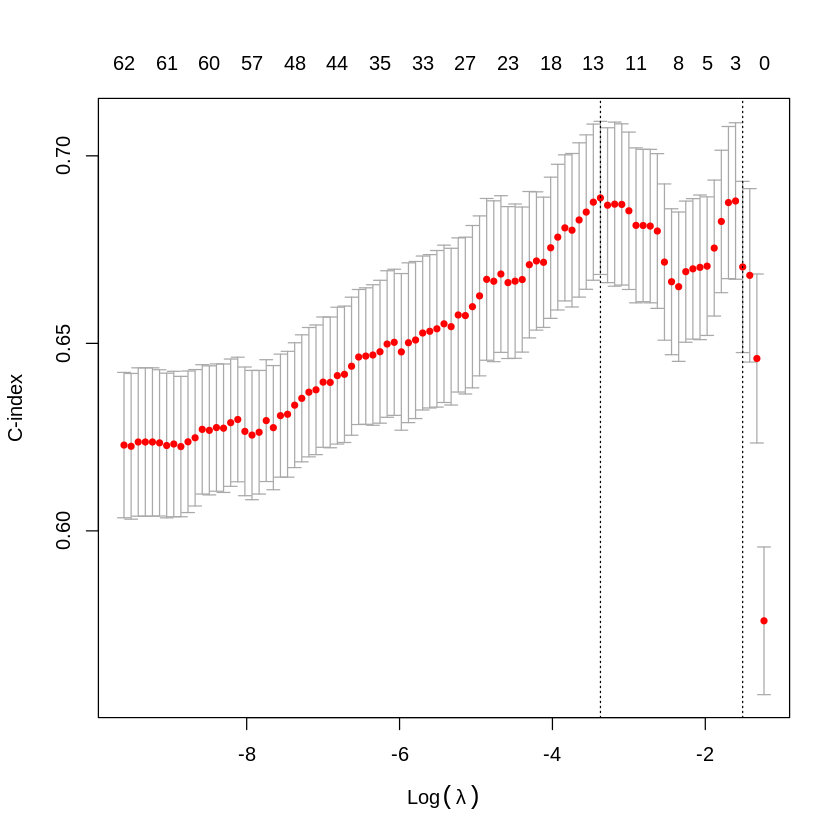

In [101]:
# We use a cross validation, measuring the concordance 
fit = cv.glmnet(x, y, family = "cox", nfolds = 10, type.measure = "C")
plot(fit)

Choose `lambda = fit$lambda.min` or `lambda = fit$lambda.1se`.

In [106]:
# We use as lambda, the min + 1 standard error to now calculate the model
modelB = glmnet(x, y, family = "cox", lambda=fit$lambda.min)
modelB$beta

62 x 1 sparse Matrix of class "dgCMatrix"
                                                     s0
original_shape_Compactness1                   .        
original_shape_Compactness2                   .        
original_shape_Maximum3DDiameter              0.1583921
original_shape_SphericalDisproportion         .        
original_shape_Sphericity                     .        
original_shape_SurfaceArea                    .        
original_shape_SurfaceVolumeRatio             .        
original_shape_VoxelVolume                    0.3367758
original_firstorder_Energy                    .        
original_firstorder_Entropy                   .        
original_firstorder_Kurtosis                  .        
original_firstorder_Maximum                   0.1544755
original_firstorder_Mean                      0.8908783
original_firstorder_MeanAbsoluteDeviation     .        
original_firstorder_Median                    .        
original_firstorder_Minimum                   .        
origin

Extracting the non-zero coefficient. We will use those features in Python to train models Cox Model.

In [107]:
features = as.matrix(modelB$beta)
row_sub = apply(features, 1, function(row) all(row !=0 ))
selected_features = as.matrix(features[row_sub,])
# write.table(selected_features, 'selected_features.csv')
rownames(selected_features)

[1] "original_shape_Maximum3DDiameter"     
 [2] "original_shape_VoxelVolume"           
 [3] "original_firstorder_Maximum"          
 [4] "original_firstorder_Mean"             
 [5] "original_glcm_ClusterProminence"      
 [6] "original_glrlm_GrayLevelNonUniformity"
 [7] "original_glrlm_RunPercentage"         
 [8] "Mstage"                               
 [9] "Nstage"                               
[10] "SourceDataset"                        
[11] "age"                                  
[12] "Histology_nos"